In [1]:
# Import necessary libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
# Paths to your image files
#file_path_1 = '/home/klinfys/Desktop/nnUNet_raw/Dataset846_GA-17bMT/imagesTs/01_01A_0001.nii.gz'
#label_path_mes = '/home/klinfys/Desktop/nnUNet_raw/Dataset846_GA-17bMT/labelsTs/01_01ASMA.nii.gz'
#label_path_trunc = '/home/klinfys/Desktop/nnUNet_raw/Dataset846_GA-17bMT/labelsTs/01_01ATC.nii.gz'

file_path_1 = '/run/user/1000/gvfs/smb-share:server=10.141.40.29,share=loggededata/GA17/MRdata/FP_HL/DagA/T2Star_Images_21_.nii' 
label_path_gall = '/home/klinfys/Desktop/nnUNet_raw/Dataset333_MonaiLabel/imagesTs_pred_3d_fullres/HL_21A.nii.gz'

#nib
image_nib_1=nib.load(file_path_1)
#label_nib_trunc=nib.load(label_path_trunc)
#label_nib_mes=nib.load(label_path_mes)
label_nib_gall=nib.load(label_path_gall)

print(f'Image shape is {image_nib_1.shape}')
#print(f'Mes shape is {label_nib_mes.shape}')
#print(f'Trunc shape is {label_nib_trunc.shape}')

print(f'Gall shape is {label_nib_gall.shape}')

np.unique(label_nib_gall.get_fdata())

Image shape is (256, 192, 30)
Gall shape is (256, 192, 30)


array([0., 1.])

In [3]:
print(label_nib_mes.affine)
print(label_nib_mes.header)


NameError: name 'label_nib_mes' is not defined

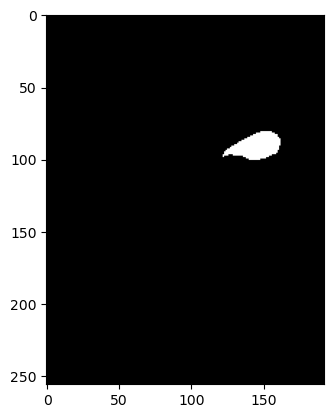

In [12]:
plt.imshow(label_nib_gall.get_fdata()[:,:,21], cmap='gray')

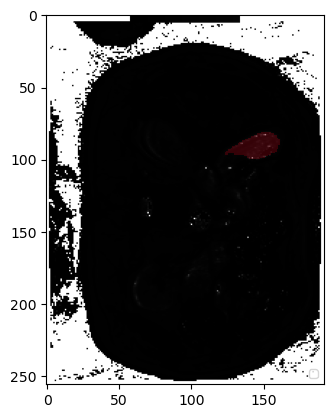

In [17]:
plt.imshow((image_nib_1.get_fdata()[:,:,21]), cmap='gray')

# Create a list to hold the patch handles
legend_patches = []

# Define colors for each label
c = ['Reds', 'Blues']
#labels = [ 'Vena Porta', 'Arteria Hepatica']

lbl = (((label_nib_gall.get_fdata()[:,:,21]).astype('float')))
lbl[lbl == 0] = np.NaN
plt.imshow((lbl), cmap=c[0], vmin=0, vmax=1, alpha=0.5)

#lbl = ((label_nib_trunc.get_fdata()[:,:,8]).astype('float'))
#lbl[lbl == 0] = np.NaN
#plt.imshow((lbl), cmap=c[1], vmin=0, vmax=1, alpha=0.5)


# Display the legend
plt.legend(handles=legend_patches, loc='lower right', fontsize='small', handlelength=1, handletextpad=1)

# Show the plot
plt.show()

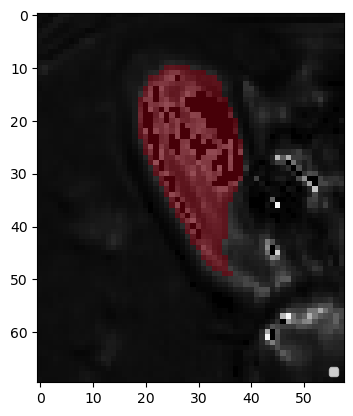

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# File paths
file_path_1 = '/run/user/1000/gvfs/smb-share:server=10.141.40.29,share=loggededata/GA17/MRdata/FP_HL/DagA/T2Star_Images_21_.nii'
label_path_gall = '/home/klinfys/Desktop/nnUNet_raw/Dataset333_MonaiLabel/imagesTs_pred_3d_fullres/HL_21A.nii.gz'

# Load image and label data
image_nib_1 = nib.load(file_path_1)
label_nib_gall = nib.load(label_path_gall)

# Extract the specific slice and rotate
image_slice = np.rot90(image_nib_1.get_fdata()[:, :, 21])
label_slice_gall = np.rot90(label_nib_gall.get_fdata()[:, :, 21].astype('float'))
label_slice_gall[label_slice_gall == 0] = np.NaN

# Apply threshold to the image
lower_threshold = 5  # Set your desired lower threshold value here
upper_threshold = 230  # Set your desired upper threshold value here
thresholded_image = np.where((image_slice >= lower_threshold) & (image_slice <= upper_threshold), image_slice, 0)

# Define new cropping coordinates (more suitable for the image size)
left, top, right, bottom = 62, 20, 120, 90

# Crop the image to the specified coordinates
cropped_image = thresholded_image[top:bottom, left:right]
cropped_label_gall = label_slice_gall[top:bottom, left:right]

# Plot the cropped image
plt.imshow(cropped_image, cmap='gray')

# Overlay the label
c = ['Reds', 'Blues']
plt.imshow(cropped_label_gall, cmap=c[0], vmin=0, vmax=1, alpha=0.7)

# Create a list to hold the patch handles for the legend
legend_patches = []

# Display the legend
plt.legend(handles=legend_patches, loc='lower right', fontsize='small', handlelength=1, handletextpad=1)

# Show the plot
plt.show()
